In [1]:
using Statistics, LinearAlgebra, Random, DataFrames, Plots, StatsPlots, CSV

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1192
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1192
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1192


In [2]:
# load data
tax = CSV.read("incomeTaxData.csv")

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome
,Int64,String,String,String⍰,Int64⍰,Int64⍰
1,2011,Hamilton,"500,000 and over",d/,missing,missing
2,2003,Dutchess,"100,000 - 199,999",missing,12738,1668991
3,2001,Ontario,Total,missing,44898,1829734
4,2012,New York City - Richmond,"30,000 - 39,999",missing,16086,559918
5,2007,Clinton,"50,000 - 59,999",missing,2197,120482
6,1999,Saratoga,Total,missing,88920,3969074
7,2010,Onondaga,"60,000 - 74,999",missing,13837,928570
8,2008,Ulster,"40,000 - 49,999",missing,5971,266988
9,2005,Clinton,Total,missing,33634,1284580


You can see just from the first line of the dataset that the there are some rows with no returns associated with it. Let's delete those from the dataset.

Also note that all of the data is in thousands of dollars.

In [3]:
# clean data
tax = tax[.!(ismissing.(tax[:,:ReturnCount])), :];
sort(tax, :Year)

# create new columns
tax[!,:avg_tax] = tax[:,:TotalTaxLiability]./tax[:,:ReturnCount];

# a)

Plot the number of returns in Tompkins County over time.
（you should draw the plot for each income class and ignore the rows with the class of 'Total'.）


In [5]:
tax = sort(tax, cols = :Year)
tax[:County] = strip.(tax[:County])
tompkins = tax[tax[:County] .== "Tompkins",:]
cleaned = tompkins[tompkins[:IncomeClass] .!= "Total",:]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:2
└ @ Core In[5]:2
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[5]:2
└ @ Core In[5]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:3
└ @ Core In[5]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:4
└ @ Core In[5]:4


,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions
,Int64,SubStrin…,String,String⍰,Int64⍰,Int64⍰,Int64⍰
1,1999,Tompkins,"100,000 - 199,999",missing,1978,261304,35186
2,1999,Tompkins,"50,000 - 59,999",missing,2126,116249,27068
3,1999,Tompkins,"Under 5,000",missing,4861,11343,10632
4,1999,Tompkins,"60,000 - 74,999",missing,2281,152640,30366
5,1999,Tompkins,"40,000 - 49,999",missing,2578,115213,29844
6,1999,Tompkins,"5,000 - 9,999",missing,3469,25638,21199
7,1999,Tompkins,"20,000 - 29,999",missing,4823,118854,46522
8,1999,Tompkins,"200,000 and over",missing,542,234793,14694
9,1999,Tompkins,"10,000 - 19,999",missing,5950,88823,52034


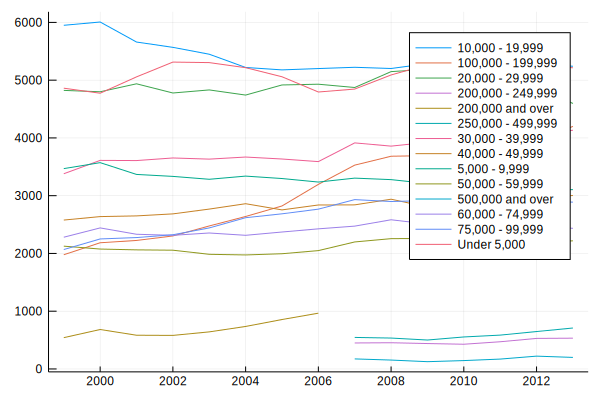

In [6]:
@df cleaned StatsPlots.plot(:Year, :ReturnCount, group=:IncomeClass)


Plot the average income tax per return in Tompkins County (disregarding income tax).
（you could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The added up number might be different with the number in 'total', and it should be fine.）

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:1
└ @ Core In[7]:1


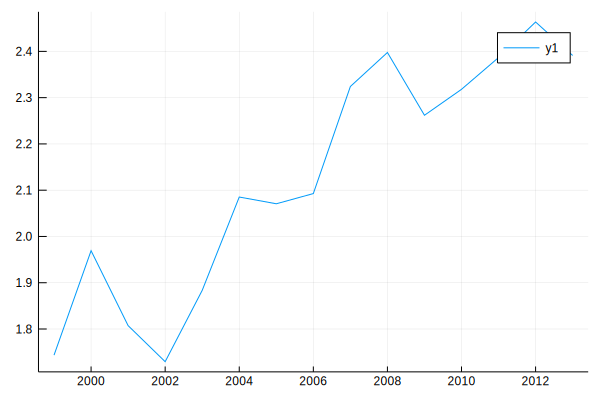

In [7]:
totals = tompkins[tompkins[:IncomeClass] .== "Total",:]
@df totals StatsPlots.plot(:Year,:avg_tax)

What kind of plot did you choose to make? Why?

I used a line plot for the first because it easy to see the income classes by the color and the overall trend for each throughout the years.

I used a scatter plot (connected) for the second because it shows how the Total moves throughout the years (not differentiated by income class)

# b)

Continuing to look only at Tompkins County, fit a model that predicts avg_tax using the year number. Do this with least squares.

In [8]:
X = totals[:,:Year]
Y = totals[:,:avg_tax]
w = X\Y

0.001061207752281709

Transform the input to include an offset term in the model

In [9]:
X_offset = [X ones(length(X))]
w_2=X_offset\Y

2-element Array{Float64,1}:
    0.05272998568828175
 -103.64804933914492   

# c)

Now we will change the feature space.
Fit a model using the year and the avg_tax from the previous year.

In [10]:
years = X[2:length(X),:]
avg_tax_prev = Y[1:length(Y)-1,:]
w_3 = [years avg_tax_prev ones(length(X)-1)]\Y[2:length(Y),:]

3×1 Array{Float64,2}:
   0.04146927373879145
   0.19107589488621238
 -81.45539241048218   

Interpret the coefficients of this. What do they mean?

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

The real average tax rate is linearly proportional to the year and average tax rate of the previous year. The average tax rate appears to increase over time and has a positive correlation with the previous years average tax rate which makes sense. The model below fits decently well and according to the error, the predicted values seem to be a bit higher than the actual values for average tax rate. We can improve this with more features.

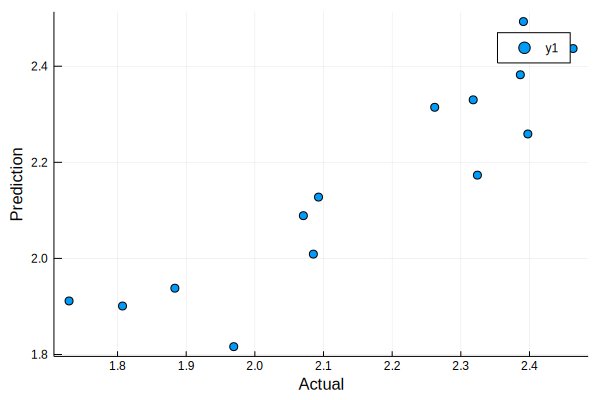

In [11]:
prediction = [years avg_tax_prev ones(length(X)-1)] * w_3
StatsPlots.scatter(Y[2:length(Y),:],prediction)
xlabel!("Actual")
ylabel!("Prediction")

# d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

Fit this model and interpret the coefficients. 

In [12]:
#Going to use the avg_tax from 2 years and 3 years ago
y_len = size(Y)[1]
avgtax_back1 = Y[3:y_len-1,:]
avgtax_back2 = Y[2:y_len-2,:]
avgtax_back3 = Y[1:y_len-3,:]
Y_4 = Y[4:y_len,:]
years = X[4:length(X),:]
X_4 = [years avgtax_back1 avgtax_back2 avgtax_back3 ones(length(X)-3)]
w_4 = X_4\Y_4

5×1 Array{Float64,2}:
   0.012409772861691176
   0.8558303740124675  
  -0.6750776678882586  
   0.49150499935003317 
 -24.139968564110024   

The 2 new features I added are the avg_tax from 2 and 3 years back. I think they will predict the data well because they add to the history of avg_tax we can use and are obviously very similar metrics for the county. They are both available in year t by the end of year t-1. These coefficients show that the current average tax has a strong positive correlation with the average tax from 1 year back and another positive correlation with the average tax from 3 years back. There is a negative correlation with the average tax from 2 years back.

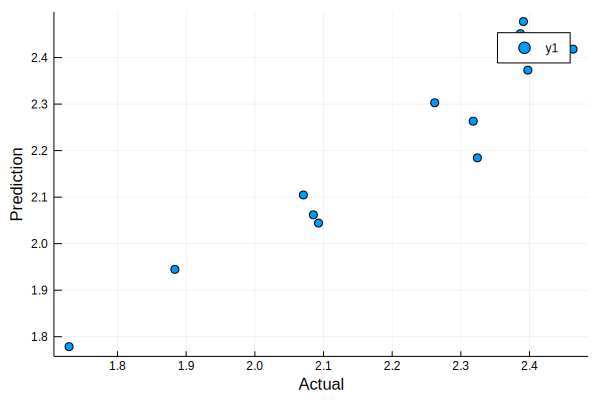

In [13]:
prediction = [years avgtax_back1 avgtax_back2 avgtax_back3 ones(length(X)-3)] * w_4
StatsPlots.scatter(Y_4,prediction)
xlabel!("Actual")
ylabel!("Prediction")

# e)

Compare the coefficients from part c and d. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

The coefficient of avg_tax made a large jump from 0.19 to 0.86. I think this difference is so significant because there are now more features and the offset also has less of an impact

# f)

Now we want to see how this model performs in other counties. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

In [29]:
totals = tax[tax[:IncomeClass] .=="Total",:]
ignore = String[]
push!(ignore,"NYS Unclassified +")
push!(ignore,"Residence Unknown ++")
push!(ignore, "Grand Total, Full-Year Resident")
ignorebool = Array{Bool}(undef, size(totals,1))

for (i,county) in enumerate(totals[:County])
    ignorebool[i] = ~(county in ignore) 
end

counted_tax = totals[ignorebool,:]
counted_tax[:County] = strip.(counted_tax[:County])

counties = Set((counted_tax[:County]))

reported = String[]

for county in counties
    if size(counted_tax[counted_tax[:County].==county,:County])[1] == 15
        push!(reported, county)
    end
end

has_all_years = Array{Bool}(undef, size(counted_tax,1)) 
for (i,county) in enumerate(counted_tax[:County])
    has_all_years[i] = (county in reported)
end

final_tax = counted_tax[has_all_years,:]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:7
└ @ Core .\In[29]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:13
└ @ Core In[29]:13
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[29]:13
└ @ Core In[29]:13
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:14
└ @ Core In[29]:14
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome
,Int64,SubStrin…,String,String⍰,Int64⍰,Int64⍰
1,1999,Saratoga,Total,missing,88920,3969074
2,1999,Rockland,Total,missing,123703,7465905
3,1999,Oneida,Total,missing,97323,3246643
4,1999,Delaware,Total,missing,19195,570872
5,1999,Orleans,Total,missing,17064,524691
6,1999,Dutchess,Total,missing,115968,5552036
7,1999,Schuyler,Total,missing,7571,228317
8,1999,Chemung,Total,missing,37163,1288103
9,1999,Monroe,Total,missing,327511,14455103


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:5
└ @ Core .\In[30]:5


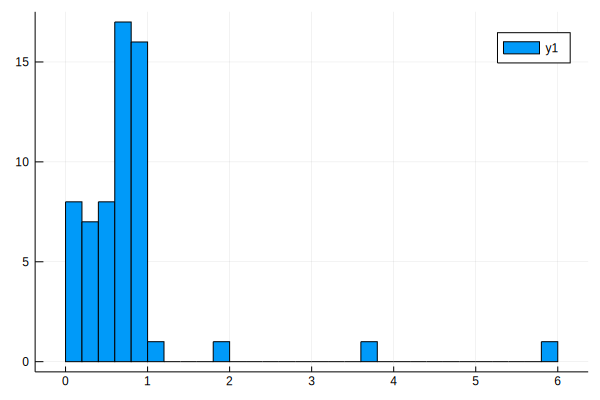

In [30]:
errors = zeros(60)
i = 1

for county in reported
    set6 = final_tax[final_tax[:County] .== county,:]
    len = size(set6)[1]
    prev_avgtax = set6[1:len-1,:avg_tax]
    years = set6[2:len,:Year] 
    X_6 = Array([years prev_avgtax ones(length(years))])
    Y_6 = Array(set6[2:len,:avg_tax])
    prediction = X_6*w_3
    error = abs.(prediction .- Y_6)
    mse = sum(error[:,1])/size(error,1)
    errors[i] = mse
    i += 1
end

histogram(errors)

Are there major outliers?

There are definitely major outliers and the mean squared error seems to be higher overall than in Tompkins County.

# g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [33]:
errors2 = zeros(60)
i = 1

for county in reported
    set7 = final_tax[final_tax[:County] .== county,:]
    len = size(set7)[1]
    avgtax_back1 = set7[3:len-1,:avg_tax]
    avgtax_back2 = set7[2:len-2,:avg_tax] 
    avgtax_back3 = set7[1:len-3,:avg_tax]
    
    years = set7[4:len,:Year] 
    X_7 = Array([years avgtax_back1 avgtax_back2 avgtax_back3 ones(length(years))])
    Y_7 = Array(set7[4:len,:avg_tax])
    w_7 = X_7\Y_7
    prediction = X_7*w_7
    error = abs.(prediction .- Y_7)
    mse = sum(error[:,1])/size(error,1)
    errors2[i] = mse
    i += 1
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:5
└ @ Core .\In[33]:5


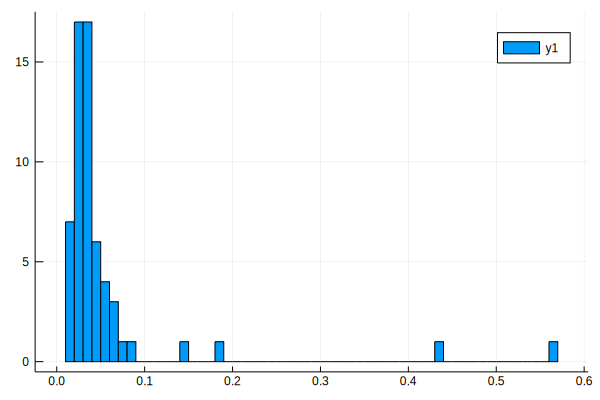

In [34]:
histogram(errors2)

Again, are there major outliers? How do the coefficients compare across counties?

There are still major outliers. Most errors are smaller than that in Tompkins County. The coefficients do differ significantly for the counties.

# h)

I would use the county-specific model because it has a much smaller median MSE than the Tompkins model. I may worry about maybe overfitting the data with the county-specific model but I think the histograms show that this isn't enough of a concern to use the Tompkins model instead.

# i)

Other information I could use to improve the model might include population statistics for specific income brackets, median home price and maybe even inflation statistics.